<a href="https://colab.research.google.com/github/AfroozHaghbin/Optimization/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

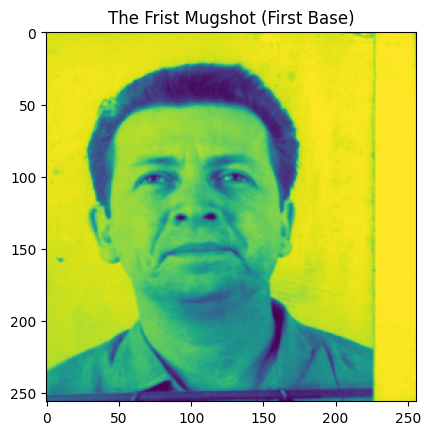

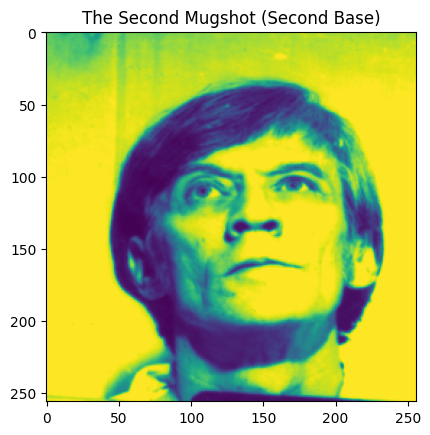

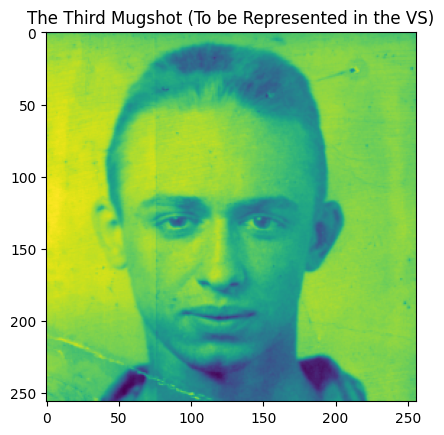

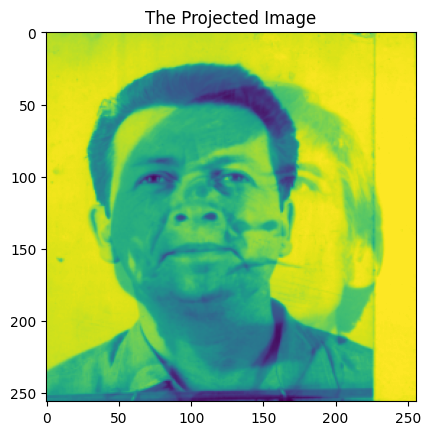

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from skimage.transform import resize
!pip install pennylane
import pennylane as qml

# This Python code is written to implement the projection theorem on the space
# generated by two mugshots

# Get the current script's directory
current_dir = os.getcwd()

# Construct the full path to the image files
# Images should be in the current directory (please upload attached images to the 'content' folder)
image_path1 = os.path.join(current_dir, '00001_1_F_first_front.png')
image_path2 = os.path.join(current_dir, '00003_2_F.png')
image_path3 = os.path.join(current_dir, '00004_1_F.png')

# Read Images
img1 = mpimg.imread(image_path1)
img2 = mpimg.imread(image_path2)
img3 = mpimg.imread(image_path3)


# Resampling to 256 * 256 matrices
resampling_size = (256, 256)

img1_resampled = resize(img1, resampling_size)
img2_resampled = resize(img2, resampling_size)
img3_resampled = resize(img3, resampling_size)


# Output Images to view the two basis functions and original third image
plt.title("The Frist Mugshot (First Base)")
plt.imshow(img1_resampled)
plt.show()

plt.title("The Second Mugshot (Second Base)")
plt.imshow(img2_resampled)
plt.show()

plt.title("The Third Mugshot (To be Represented in the VS)")
plt.imshow(img3_resampled)
plt.show()

# Producing Ferobenius innerproducts and forming the equations needed to solve
a11 = qml.math.frobenius_inner_product(img1_resampled, img1_resampled)
a12 = qml.math.frobenius_inner_product(img1_resampled, img2_resampled)
a21 = qml.math.frobenius_inner_product(img2_resampled, img1_resampled)
a22 = qml.math.frobenius_inner_product(img2_resampled, img2_resampled)
A=np.array([[a11, a12], [a21, a22]])

c1 = qml.math.frobenius_inner_product(img3_resampled, img1_resampled)
c2 = qml.math.frobenius_inner_product(img3_resampled, img2_resampled)

C=np.array([[c1], [c2]])

# Solving the equation in the matrix form
Coefficients = np.linalg.inv(A) @ C

# Calculating the projection of the third image on the space produced by the first two images
Projected_Image = Coefficients[0,:]*img1_resampled + Coefficients[1,:]*img2_resampled

plt.title("The Projected Image")
plt.imshow(Projected_Image)
plt.show()
